<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-2-Kaggle-Challenge/blob/master/module2/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 133kB 4.8MB/s 
     |████████████████████████████████| 614kB 54.5MB/s 
     |████████████████████████████████| 235kB 59.9MB/s 
     |████████████████████████████████| 307kB 60.1MB/s 
     |████████████████████████████████| 215kB 60.5MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 737kB 53.2MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=545ca68c4391cf0912bbc1b21da39626571355aa6f6d4b1db66ed835767f3f9f
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=63f710b4b736acb00e44bf556e035533dc89286d064107e14c759a988cc657f5
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [35]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

 # Do train/validate/test split with the Tanzania Waterpumps data.

In [0]:
train, val = train_test_split(train, train_size=.8, test_size = .2,
                              stratify=train['status_group'], random_state = 42)

# Begin with baselines for classification

In [5]:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

# Ideas

In [0]:
# if management = government, has there been a public_meeting?
## public meeting is Trues + missing, no false -> drop



# Data Cleaning / Exploring

In [0]:
# Consider dropping: Num_private,

In [0]:
# Representing the target as a numeric value.
# train['functional'] = (train['status_group']=='functional').astype(int)

In [0]:
# import plotly.express as px
# px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

# # https://plot.ly/python/mapbox-layers/#base-maps-in-layoutmapboxstyle
# fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=0.1)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

In [0]:
# Clean latitude data, dropping a duplicate column

import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    X['scheme_name'] = X['scheme_name'].replace('None', 0)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'amount_tsh',
                       'construction_year', 'gps_height', 'population',
                       'funder', 'installer', 'permit', 'public_meeting',
                       'scheme_management', 'scheme_name']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    # payment & payment_type also duplicates
    X = X.drop(columns='quantity_group')
    X = X.drop(columns = 'payment_type')
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')

    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_missing'] = X['years'].isnull()

    # Drop unneeded columns
    X = X.drop(columns='num_private') # 98.8% zeros, no description on kaggle
    X = X.drop(columns='waterpoint_type_group') # Almost duplicate, worse
    X = X.drop(columns='public_meeting') # Only Trues & missing values
    # X = X.drop(columns='wpt_name') # 3rd iteration
    # Consider dropping scheme_name
    # Consider dropping wpt_name
    X = X.drop(columns='extraction_type') # 4th iteration
    X = X.drop(columns='extraction_type_group')
    # Consider dropping extraction_type & extraction_type_group

    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

### Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
# Set target
target = 'status_group'

# get a dataframe with all train columns - target & id
train_features = train.drop(columns=[target])

# Get a list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years', 'basin', 'region', 'scheme_management', 'permit', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'years_missing']


In [0]:
# Arrange the data into X features matrix and y target vector

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

#  Get your validation accuracy score.

In [13]:
# Logistic Regression baseline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs =-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Logistic Regression Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test (submit kaggle)
y_pred = pipeline.predict(X_test)

Logistic Regression Validation Accuracy 0.5889730639730639


# Get and plot your feature importances.

In [0]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# model = pipeline.named_steps['logisticregression']
# encoder = pipeline.named_steps['onehotencoder']
# encoded_columns = encoder.transform(X_val).columns
# coefficients = pd.Series(model.coef_[0], encoded_columns)
# plt.figure(figsize=(10,30))
# coefficients.sort_values().plot.barh(color='grey')

# Decision Tree modeling

In [15]:
# Will be iterating on this

from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    DecisionTreeClassifier(random_state = 42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test (submit kaggle)
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7532828282828283


In [16]:
# Will be iterating on this

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    # StandardScaler(),
    DecisionTreeClassifier(random_state = 42, max_depth=20, min_samples_leaf=6,
                           min_samples_split=15)
) # 78.224% day 1 end-> 78.249 day 2 start
# 77.61% with 'median' strategy
# 77.77% after feature engineering day 2
# 77.74 after more feature engineering
# 77.99 4th iteration

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test (submit kaggle)
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7798821548821548


# Iterating, Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
%%time

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    RandomForestClassifier(random_state = 42, n_jobs=-1, n_estimators=100,
                           max_depth=20)
) # 80.7% first iteration -> 80.89 (max_depth=20)
  # 80.68% 2nd iteration
  # 80.8 3rd iteration
  # 80.72% 4th iteration
# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test (submit kaggle)
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.8071548821548822
CPU times: user 17.5 s, sys: 181 ms, total: 17.6 s
Wall time: 10.7 s


# Ordinal encoding

In [0]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [42]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

# 80.97% first iteration
# 80.98% (strategy='median')
# 81% 2nd iteration
# 80.93% 3rd iteration
# 80.74 4th iteration, note: above cell was commented out, possibly last 2 its'
# 81% after fixing above cell -> best so far
# 81.11% n_estimators = 500
# 81.20 n_estimators = 1000

# Predict on test (submit kaggle)
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.810016835016835


In [0]:
# Submission

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('4th-Submission.csv', index=False)

# Download submission
from google.colab import files
files.download('4th-Submission.csv')

In [31]:
print('X_train shape before encoding', X_train.shape) # note I have 41 columns

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (47520, 35)
X_train shape after encoding (47520, 35)


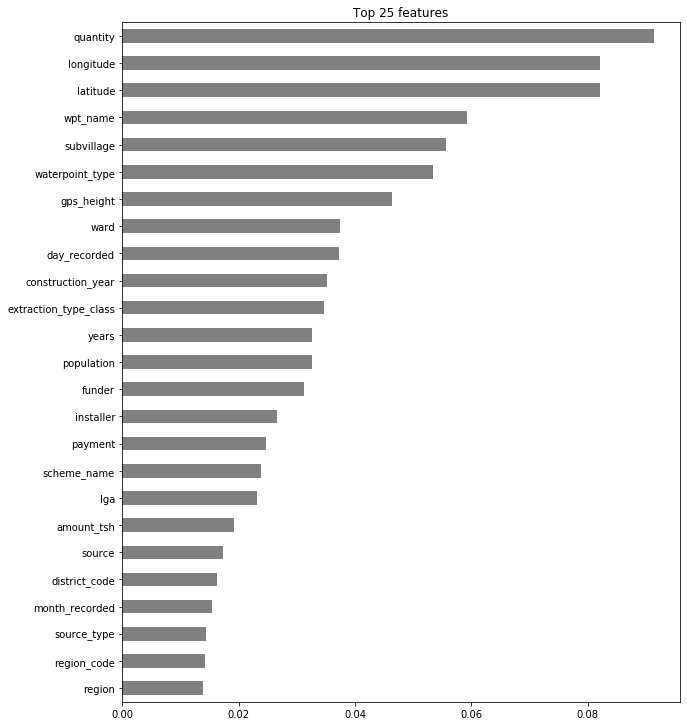

In [32]:
# Get feature importances
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 25
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

# Investigate: wpt_name, day_recorded, 
# Consider adding amount_tsh back

## Ignore

In [0]:
# # Kaggle submission

# #Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
# submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

# #Visualize the first 5 rows
# submission.head()

# #Convert DataFrame to a csv file that can be uploaded
# #This is saved in the same directory as your notebook
# filename = 'Tanzania Predictions 1.csv'

# submission.to_csv(y_pred,index=False)

# print('Saved file: ' + filename)

In [0]:
# model = pipeline.named_steps['decisiontreeclassifier']
# # Linear models have coefficients, 
# # Trees have feature importances

# encoder = pipeline.named_steps['onehotencoder']
# encoded_columns = encoder.transform(X_val).columns # Why X_val and not X_train?
# importances = pd.Series(model.feature_importances_, encoded_columns)
# plt.figure(figsize=(10,30))
# importances.sort_values() # .plot.barh(color='grey')

In [0]:
# # Keeping in line with lecture to have order in things
# train_location = X_train[['longitude', 'latitude']].copy()
# val_location = X_val[['longitude', 'latitude']].copy()

In [0]:
# 'dt = make_pipeline(
#     SimpleImputer(), 
#     DecisionTreeClassifier(max_depth=16, random_state=42)
# )

# dt.fit(train_location, y_train)
# print('Decision Tree Classifier')
# print('Train Accuracy', dt.score(train_location, y_train))
# print('Validation Accuracy', dt.score(val_location, y_val))'

In [0]:
# from IPython.display import display, HTML
# import graphviz
# from sklearn.tree import export_graphviz

# for max_depth in range(4, 20):
#   # Fit decision tree
#   dt = make_pipeline(
#       SimpleImputer(),
#       DecisionTreeClassifier(max_depth=max_depth, random_state=42)
#   )
#   dt.fit(encoded_columns, y_train) # train_location instead of X_train originally (2 features)

#  # Display depth & scores
#   display(HTML(f'Max Depth {max_depth}'))
#   display(HTML(f'Train Accuracy {dt.score(train_location, y_train):.2f}'))
#   display(HTML(f'Validation Accuracy {dt.score(val_location, y_val):.2f}'))

#   # # Plot heatmap of predicted probabilities
#   # pred_heatmap(dt, X_train, features, class_index=0, title='Predicted probability')